
# Problem Statement

Election, COVID, and Demographic Data by County: What Factors Influenced the USA 2020 Election?(https://www.kaggle.com/etsc9287/2020-general-election-polls) Awesome data compilation of “How Voting Was” in the years 2016, and 2020 (the COVID-19 year). As can be seen, there are definitely factors that caused a shift in the opinion of voters between 2016 and 2020. With this dataset, these factors can be found out, as well as other things responsible for the poll results in both years across the states.


# Importing required modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from scipy.stats import skew
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (15,12)


# Loading the Dataset

In [4]:
df=pd.read_csv('county_statistics.csv')
trump_clinton_df=pd.read_csv("trump_clinton_polls.csv")
trump_biden_df = pd.read_csv("trump_biden_polls.csv")
trump_biden_df.head()

<ipython-input-4-74331db31bcf>:3: DtypeWarning: Columns (6,22,25,29) have mixed types. Specify dtype option on import or set low_memory=False.
  trump_biden_df = pd.read_csv("trump_biden_polls.csv")


,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,created_at,notes,url,stage,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,136283,72621,2020,Iowa,383,Public Policy Polling,NaN,NaN,Public Policy Polling,263.0,...,11/2/20 09:02,NaN,https://www.publicpolicypolling.com/wp-content...,general,6223,Biden,13256,Joseph R. Biden Jr.,DEM,49.0
1,136283,72621,2020,Iowa,383,Public Policy Polling,NaN,NaN,Public Policy Polling,263.0,...,11/2/20 09:02,NaN,https://www.publicpolicypolling.com/wp-content...,general,6223,Trump,13254,Donald Trump,REP,48.0
2,136322,72647,2020,Pennsylvania,461,Susquehanna Polling & Research Inc.,NaN,NaN,Susquehanna Polling & Research Inc.,326.0,...,11/2/20 12:49,NaN,https://www.realclearpolitics.com/docs/2020/Su...,general,6249,Biden,13256,Joseph R. Biden Jr.,DEM,48.4
3,136322,72647,2020,Pennsylvania,461,Susquehanna Polling & Research Inc.,NaN,NaN,Susquehanna Polling & Research Inc.,326.0,...,11/2/20 12:49,NaN,https://www.realclearpolitics.com/docs/2020/Su...,general,6249,Trump,13254,Donald Trump,REP,49.2
4,136322,72647,2020,Pennsylvania,461,Susquehanna Polling & Research Inc.,NaN,NaN,Susquehanna Polling & Research Inc.,326.0,...,11/2/20 12:49,NaN,https://www.realclearpolitics.com/docs/2020/Su...,general,6249,Jorgensen,14611,Jo Jorgensen,LIB,1.4


In [5]:
trump_biden_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16438 entries, 0 to 16437
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   question_id                16438 non-null  int64  
 1   poll_id                    16438 non-null  int64  
 2   cycle                      16438 non-null  int64  
 3   state                      11385 non-null  object 
 4   pollster_id                16438 non-null  int64  
 5   pollster                   16438 non-null  object 
 6   sponsor_ids                9968 non-null   object 
 7   sponsors                   9968 non-null   object 
 8   display_name               16438 non-null  object 
 9   pollster_rating_id         16425 non-null  float64
 10  pollster_rating_name       16425 non-null  object 
 11  fte_grade                  15253 non-null  object 
 12  sample_size                16436 non-null  float64
 13  population                 16438 non-null  obj

# Cleaning the Dataset

In [7]:
#dropping irrelevant columns
trump_biden_df.drop(columns=["notes", "seat_name", "sponsor_candidate", "partisan", "tracking"],inplace=True, axis=1)
trump_biden_df.head()

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,ranked_choice_reallocated,created_at,url,stage,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,136283,72621,2020,Iowa,383,Public Policy Polling,NaN,NaN,Public Policy Polling,263.0,...,False,11/2/20 09:02,https://www.publicpolicypolling.com/wp-content...,general,6223,Biden,13256,Joseph R. Biden Jr.,DEM,49.0
1,136283,72621,2020,Iowa,383,Public Policy Polling,NaN,NaN,Public Policy Polling,263.0,...,False,11/2/20 09:02,https://www.publicpolicypolling.com/wp-content...,general,6223,Trump,13254,Donald Trump,REP,48.0
2,136322,72647,2020,Pennsylvania,461,Susquehanna Polling & Research Inc.,NaN,NaN,Susquehanna Polling & Research Inc.,326.0,...,False,11/2/20 12:49,https://www.realclearpolitics.com/docs/2020/Su...,general,6249,Biden,13256,Joseph R. Biden Jr.,DEM,48.4
3,136322,72647,2020,Pennsylvania,461,Susquehanna Polling & Research Inc.,NaN,NaN,Susquehanna Polling & Research Inc.,326.0,...,False,11/2/20 12:49,https://www.realclearpolitics.com/docs/2020/Su...,general,6249,Trump,13254,Donald Trump,REP,49.2
4,136322,72647,2020,Pennsylvania,461,Susquehanna Polling & Research Inc.,NaN,NaN,Susquehanna Polling & Research Inc.,326.0,...,False,11/2/20 12:49,https://www.realclearpolitics.com/docs/2020/Su...,general,6249,Jorgensen,14611,Jo Jorgensen,LIB,1.4


In [8]:
trump_biden_df.isnull().sum()

question_id                     0
poll_id                         0
cycle                           0
state                        5053
pollster_id                     0
pollster                        0
sponsor_ids                  6470
sponsors                     6470
display_name                    0
pollster_rating_id             13
pollster_rating_name           13
fte_grade                    1185
sample_size                     2
population                      0
population_full                 0
methodology                   300
office_type                     0
seat_number                     0
start_date                      0
end_date                        0
election_date                   0
internal                        0
nationwide_batch                0
ranked_choice_reallocated       0
created_at                      0
url                           208
stage                           0
race_id                         0
answer                          0
candidate_id  

In [9]:
#Checking duplicate values
trump_biden_df.duplicated().any()

False

In [10]:
trump_biden_df.shape

(16438, 33)

In [11]:
#droping rows with missing values
trump_biden_df = trump_biden_df.dropna(axis=1, thresh=33)
trump_biden_df.isnull().sum()

question_id                     0
poll_id                         0
cycle                           0
state                        5053
pollster_id                     0
pollster                        0
sponsor_ids                  6470
sponsors                     6470
display_name                    0
pollster_rating_id             13
pollster_rating_name           13
fte_grade                    1185
sample_size                     2
population                      0
population_full                 0
methodology                   300
office_type                     0
seat_number                     0
start_date                      0
end_date                        0
election_date                   0
internal                        0
nationwide_batch                0
ranked_choice_reallocated       0
created_at                      0
url                           208
stage                           0
race_id                         0
answer                          0
candidate_id  

In [12]:
trump_biden_df['start_date'] = pd.to_datetime(trump_biden_df['start_date'])
trump_biden_df['end_date'] = pd.to_datetime(trump_biden_df['end_date'])
trump_biden_df.head()

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,...,ranked_choice_reallocated,created_at,url,stage,race_id,answer,candidate_id,candidate_name,candidate_party,pct
0,136283,72621,2020,Iowa,383,Public Policy Polling,NaN,NaN,Public Policy Polling,263.0,...,False,11/2/20 09:02,https://www.publicpolicypolling.com/wp-content...,general,6223,Biden,13256,Joseph R. Biden Jr.,DEM,49.0
1,136283,72621,2020,Iowa,383,Public Policy Polling,NaN,NaN,Public Policy Polling,263.0,...,False,11/2/20 09:02,https://www.publicpolicypolling.com/wp-content...,general,6223,Trump,13254,Donald Trump,REP,48.0
2,136322,72647,2020,Pennsylvania,461,Susquehanna Polling & Research Inc.,NaN,NaN,Susquehanna Polling & Research Inc.,326.0,...,False,11/2/20 12:49,https://www.realclearpolitics.com/docs/2020/Su...,general,6249,Biden,13256,Joseph R. Biden Jr.,DEM,48.4
3,136322,72647,2020,Pennsylvania,461,Susquehanna Polling & Research Inc.,NaN,NaN,Susquehanna Polling & Research Inc.,326.0,...,False,11/2/20 12:49,https://www.realclearpolitics.com/docs/2020/Su...,general,6249,Trump,13254,Donald Trump,REP,49.2
4,136322,72647,2020,Pennsylvania,461,Susquehanna Polling & Research Inc.,NaN,NaN,Susquehanna Polling & Research Inc.,326.0,...,False,11/2/20 12:49,https://www.realclearpolitics.com/docs/2020/Su...,general,6249,Jorgensen,14611,Jo Jorgensen,LIB,1.4


In [13]:
trump_clinton_df = pd.read_csv('trump_clinton_polls.csv')
trump_clinton_df.head()


,Unnamed: 0,start_date,end_date,state,pollster,fte_grade,sample_size,population,Clinton,Trump,dem_lead
0,3077,2015-11-07,2015-11-08,South Carolina,Public Policy Polling,B+,1290.0,v,40.63694,45.19826,-4.56132
1,6520,2015-11-07,2015-11-08,South Carolina,Public Policy Polling,B+,1290.0,v,40.48820,45.19637,-4.70817
2,9901,2015-11-07,2015-11-08,South Carolina,Public Policy Polling,B+,1290.0,v,40.69941,45.18212,-4.48271
3,3206,2015-11-09,2015-11-13,Virginia,Roanoke College,C+,555.0,rv,49.81532,36.21050,13.60482
4,6638,2015-11-09,2015-11-13,Virginia,Roanoke College,C+,555.0,rv,49.00173,37.02524,11.97649


In [14]:
trump_clinton_df.rename(columns={'Unnamed: 0': 'S.No.'}, inplace=True)
trump_clinton_df.set_index(['S.No.'], inplace = True)
trump_clinton_df.head()

,start_date,end_date,state,pollster,fte_grade,sample_size,population,Clinton,Trump,dem_lead
S.No.,,,,,,,,,,
3077,2015-11-07,2015-11-08,South Carolina,Public Policy Polling,B+,1290.0,v,40.63694,45.19826,-4.56132
6520,2015-11-07,2015-11-08,South Carolina,Public Policy Polling,B+,1290.0,v,40.48820,45.19637,-4.70817
9901,2015-11-07,2015-11-08,South Carolina,Public Policy Polling,B+,1290.0,v,40.69941,45.18212,-4.48271
3206,2015-11-09,2015-11-13,Virginia,Roanoke College,C+,555.0,rv,49.81532,36.21050,13.60482
6638,2015-11-09,2015-11-13,Virginia,Roanoke College,C+,555.0,rv,49.00173,37.02524,11.97649


In [15]:
trump_clinton_df.shape

(10236, 10)

In [16]:
trump_clinton_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10236 entries, 3077 to 6833
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   start_date   10236 non-null  object 
 1   end_date     10236 non-null  object 
 2   state        10236 non-null  object 
 3   pollster     10236 non-null  object 
 4   fte_grade    9102 non-null   object 
 5   sample_size  10233 non-null  float64
 6   population   10236 non-null  object 
 7   Clinton      10236 non-null  float64
 8   Trump        10236 non-null  float64
 9   dem_lead     10236 non-null  float64
dtypes: float64(4), object(6)
memory usage: 879.7+ KB


In [17]:
trump_clinton_df.isnull().sum()

start_date        0
end_date          0
state             0
pollster          0
fte_grade      1134
sample_size       3
population        0
Clinton           0
Trump             0
dem_lead          0
dtype: int64

In [18]:
trump_clinton_df.duplicated().any()

False

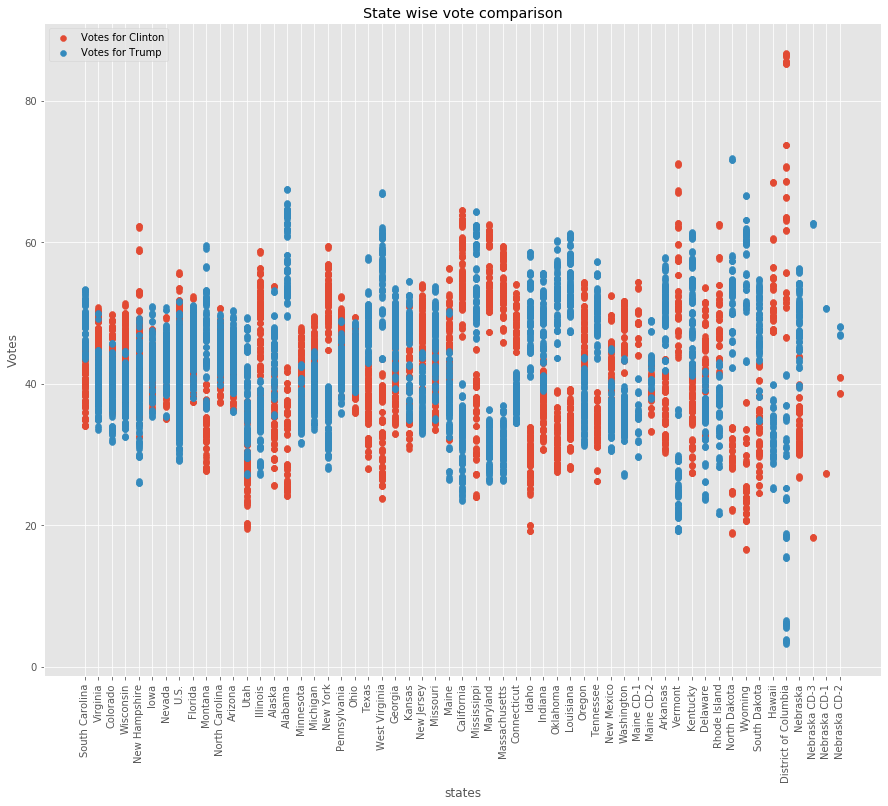

In [19]:
plt.xticks(rotation = 90)

x1 = trump_clinton_df['state']
y1 = trump_clinton_df['Clinton']

plt.scatter(x1, y1, label = "Votes for Clinton")

x2 = trump_clinton_df['state']
y2 = trump_clinton_df['Trump']

plt.scatter(x2, y2, label = "Votes for Trump")
 
plt.xlabel('states')

plt.ylabel('Votes')

plt.title('State wise vote comparison')

plt.legend()

plt.show()

In [20]:
df=pd.read_csv('county_statistics.csv')
df.head()


,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0


In [21]:
df.shape

(4867, 51)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867 entries, 0 to 4866
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    4867 non-null   int64  
 1   county                        4867 non-null   object 
 2   state                         4867 non-null   object 
 3   percentage16_Donald_Trump     3111 non-null   float64
 4   percentage16_Hillary_Clinton  3111 non-null   float64
 5   total_votes16                 3111 non-null   float64
 6   votes16_Donald_Trump          3111 non-null   float64
 7   votes16_Hillary_Clinton       3111 non-null   float64
 8   percentage20_Donald_Trump     4490 non-null   float64
 9   percentage20_Joe_Biden        4490 non-null   float64
 10  total_votes20                 4633 non-null   float64
 11  votes20_Donald_Trump          4633 non-null   float64
 12  votes20_Joe_Biden             4633 non-null   float64
 13  lat

In [23]:
#dropping the index column
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()

,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,12433.0,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,28425.0,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,16938.0,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,259389.0,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,4183.0,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0


In [24]:
#checking null values
df.isna().sum()

county                             0
state                              0
percentage16_Donald_Trump       1756
percentage16_Hillary_Clinton    1756
total_votes16                   1756
votes16_Donald_Trump            1756
votes16_Hillary_Clinton         1756
percentage20_Donald_Trump        377
percentage20_Joe_Biden           377
total_votes20                    234
votes20_Donald_Trump             234
votes20_Joe_Biden                234
lat                             1615
long                            1615
cases                           1615
deaths                          1615
TotalPop                        1725
Men                             1725
Women                           1725
Hispanic                        1725
White                           1725
Black                           1725
Native                          1725
Asian                           1725
Pacific                         1725
VotingAgeCitizen                1725
Income                          1725
I

In [25]:
#checking duplicated values
df.duplicated().any()

False

# EDA

In [26]:
# Summary of the dataset
df.describe()

,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,votes20_Donald_Trump,votes20_Joe_Biden,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,3111.000000,3111.000000,3.111000e+03,3111.000000,3.111000e+03,4490.000000,4490.000000,4.633000e+03,4.633000e+03,4.633000e+03,...,3142.000000,3142.00000,3142.000000,3142.000000,3.142000e+03,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,0.636195,0.316813,4.091585e+04,19349.902604,1.956652e+04,0.585702,0.394531,3.316812e+04,1.568986e+04,1.688328e+04,...,3.235455,1.60331,4.802960,23.354870,4.793099e+04,75.069478,16.891025,7.758116,0.282368,6.364004
std,0.156098,0.153265,1.082702e+05,39130.388677,6.848931e+04,0.183775,0.180909,1.189115e+05,4.402918e+04,7.620998e+04,...,3.916257,1.68188,3.076183,5.638348,1.576220e+05,7.553859,6.276469,3.866815,0.451699,3.063165
min,0.041000,0.031000,6.400000e+01,57.000000,4.000000e+00,0.000000,0.031000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.00000,0.000000,5.100000,3.900000e+01,31.100000,4.400000,0.000000,0.000000,0.000000
25%,0.550000,0.204500,4.824500e+03,3207.000000,1.164500e+03,0.454000,0.245000,2.313000e+03,1.232000e+03,7.380000e+02,...,1.400000,0.90000,2.900000,19.600000,4.550500e+03,71.700000,12.700000,5.200000,0.100000,4.400000
50%,0.667000,0.285000,1.093500e+04,7117.000000,3.140000e+03,0.604000,0.376000,7.461000e+03,4.343000e+03,2.413000e+03,...,2.300000,1.30000,4.100000,23.100000,1.069500e+04,76.300000,15.700000,6.800000,0.200000,6.100000
75%,0.750500,0.399000,2.867500e+04,17396.500000,9.536500e+03,0.736000,0.524000,1.994700e+04,1.225800e+04,7.359000e+03,...,3.800000,1.90000,5.800000,26.900000,2.951475e+04,80.300000,19.500000,9.175000,0.300000,7.800000
max,0.953000,0.928000,2.314275e+06,590465.000000,1.654626e+06,0.962000,1.000000,4.139895e+06,1.107090e+06,2.947568e+06,...,59.200000,43.20000,33.000000,45.100000,4.805817e+06,88.800000,64.800000,38.000000,8.000000,28.800000


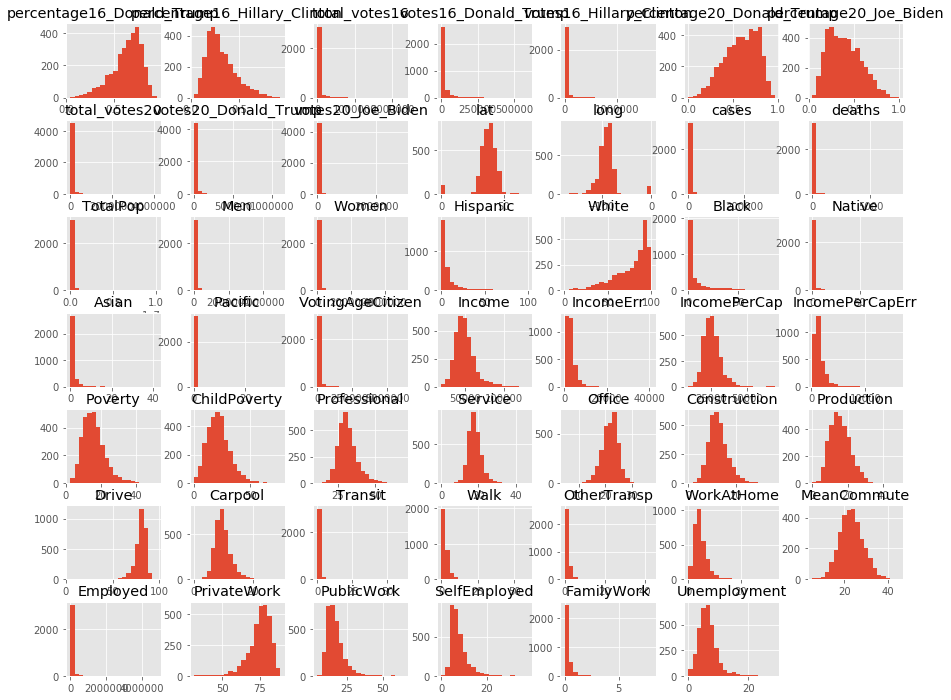

In [27]:
# Check the distribution of all the features
df.hist(bins = 20)
plt.title("Features Distribution")
plt.show()

In [28]:
#Comparing total votes in 2016 to 2020
print ('Total votes in year 2016 is:',df['total_votes16'].sum())
print ('Total votes in year 2020 is:',df['total_votes20'].sum())

Total votes in year 2016 is: 127289217.0
Total votes in year 2020 is: 153667887.0


More people voted in year 2020 than 2016

In [29]:
#Total votes by state in year 2020
df.groupby('state')['total_votes20'].sum().sort_values(ascending = False)


state
CA    16092730.0
TX    11255671.0
FL    11075446.0
PA     6804083.0
IL     6784154.0
NY     6647018.0
OH     5764587.0
MI     5531329.0
NC     5474442.0
GA     4992420.0
VA     4443375.0
NJ     4033007.0
WA     4004599.0
MA     3482216.0
AZ     3366867.0
WI     3297174.0
MN     3272469.0
CO     3216881.0
TN     3049514.0
IN     3032024.0
MO     3010316.0
MD     2729976.0
SC     2513329.0
OR     2349283.0
AL     2309900.0
LA     2148062.0
KY     2135193.0
CT     1821878.0
IA     1687692.0
OK     1560699.0
UT     1435687.0
NV     1337217.0
KS     1334330.0
AR     1209372.0
MS     1159362.0
NE      942480.0
NM      921308.0
ID      867971.0
NH      804453.0
WV      790253.0
ME      786337.0
MT      602781.0
HI      573854.0
RI      513503.0
DE      504010.0
SD      422609.0
VT      367432.0
ND      361656.0
DC      309190.0
WY      276765.0
AK      260983.0
Name: total_votes20, dtype: float64

States with the highest votes in 2020 are; CL(Carlifonia), TX(Texas), and FL(Florida)

<ipython-input-30-58a7504a2116>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('state')['total_votes16','total_votes20'].sum().plot(kind = 'bar')


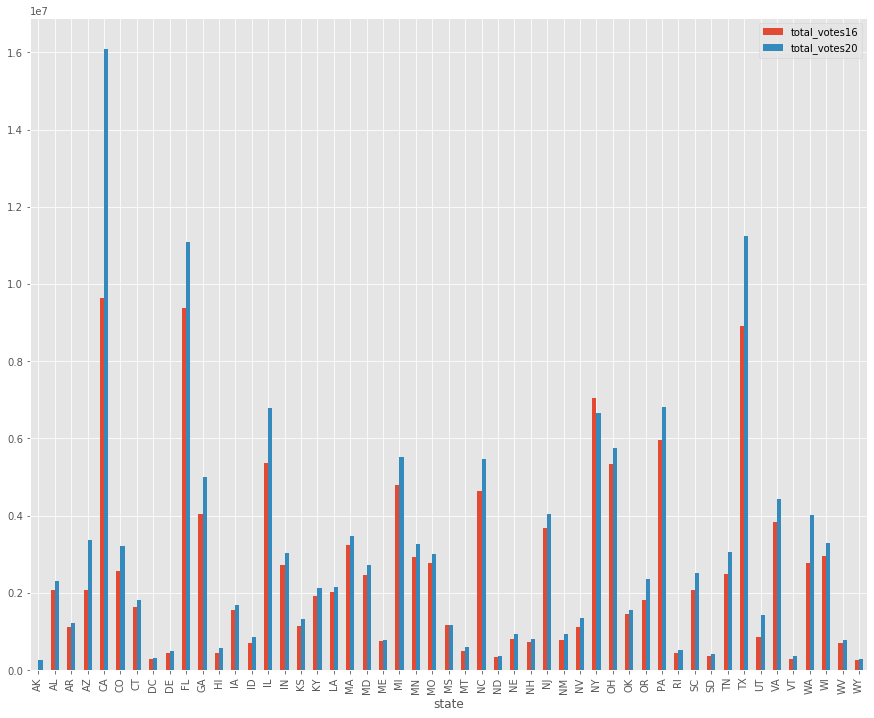

In [30]:
#Total votes by state
df.groupby('state')['total_votes16','total_votes20'].sum().plot(kind = 'bar')


In [31]:
#Comparing total votes 2020 Trump to Biden
print ('Total votes Trump is:',df['votes20_Donald_Trump'].sum())
print ('Total votes Biden is:',df['votes20_Joe_Biden'].sum())



Total votes Trump is: 72691128.0
Total votes Biden is: 78220235.0


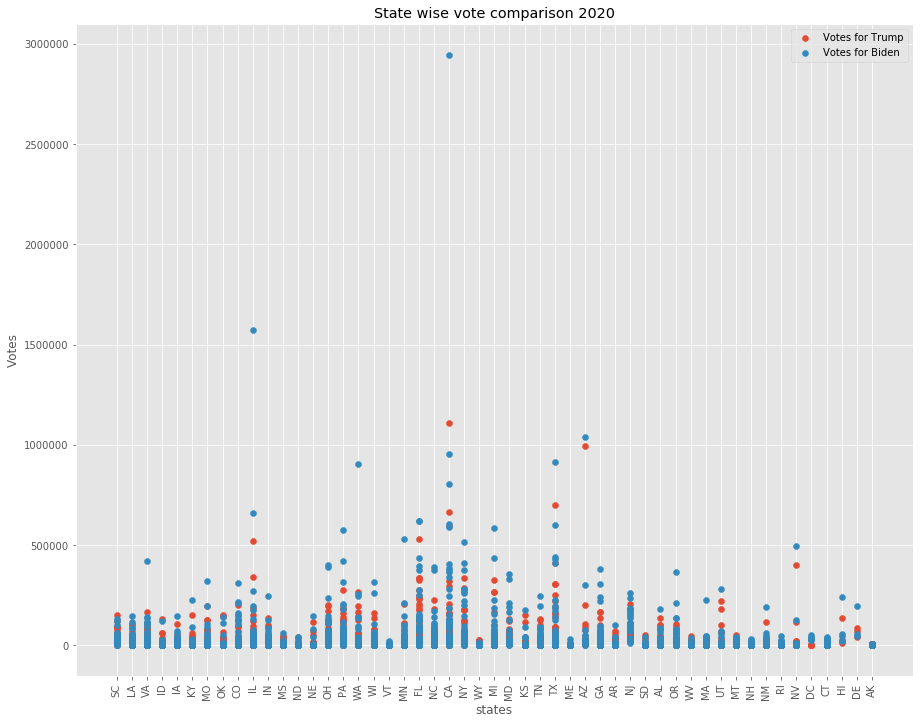

In [32]:
plt.xticks(rotation = 90)

x1 = df['state']
y1 = df['votes20_Donald_Trump']

plt.scatter(x1, y1, label = "Votes for Trump")

x2 = df['state']
y2 = df['votes20_Joe_Biden']

plt.scatter(x2, y2, label = "Votes for Biden")
 
plt.xlabel('states')

plt.ylabel('Votes')

plt.title('State wise vote comparison 2020')

plt.legend()

plt.show()


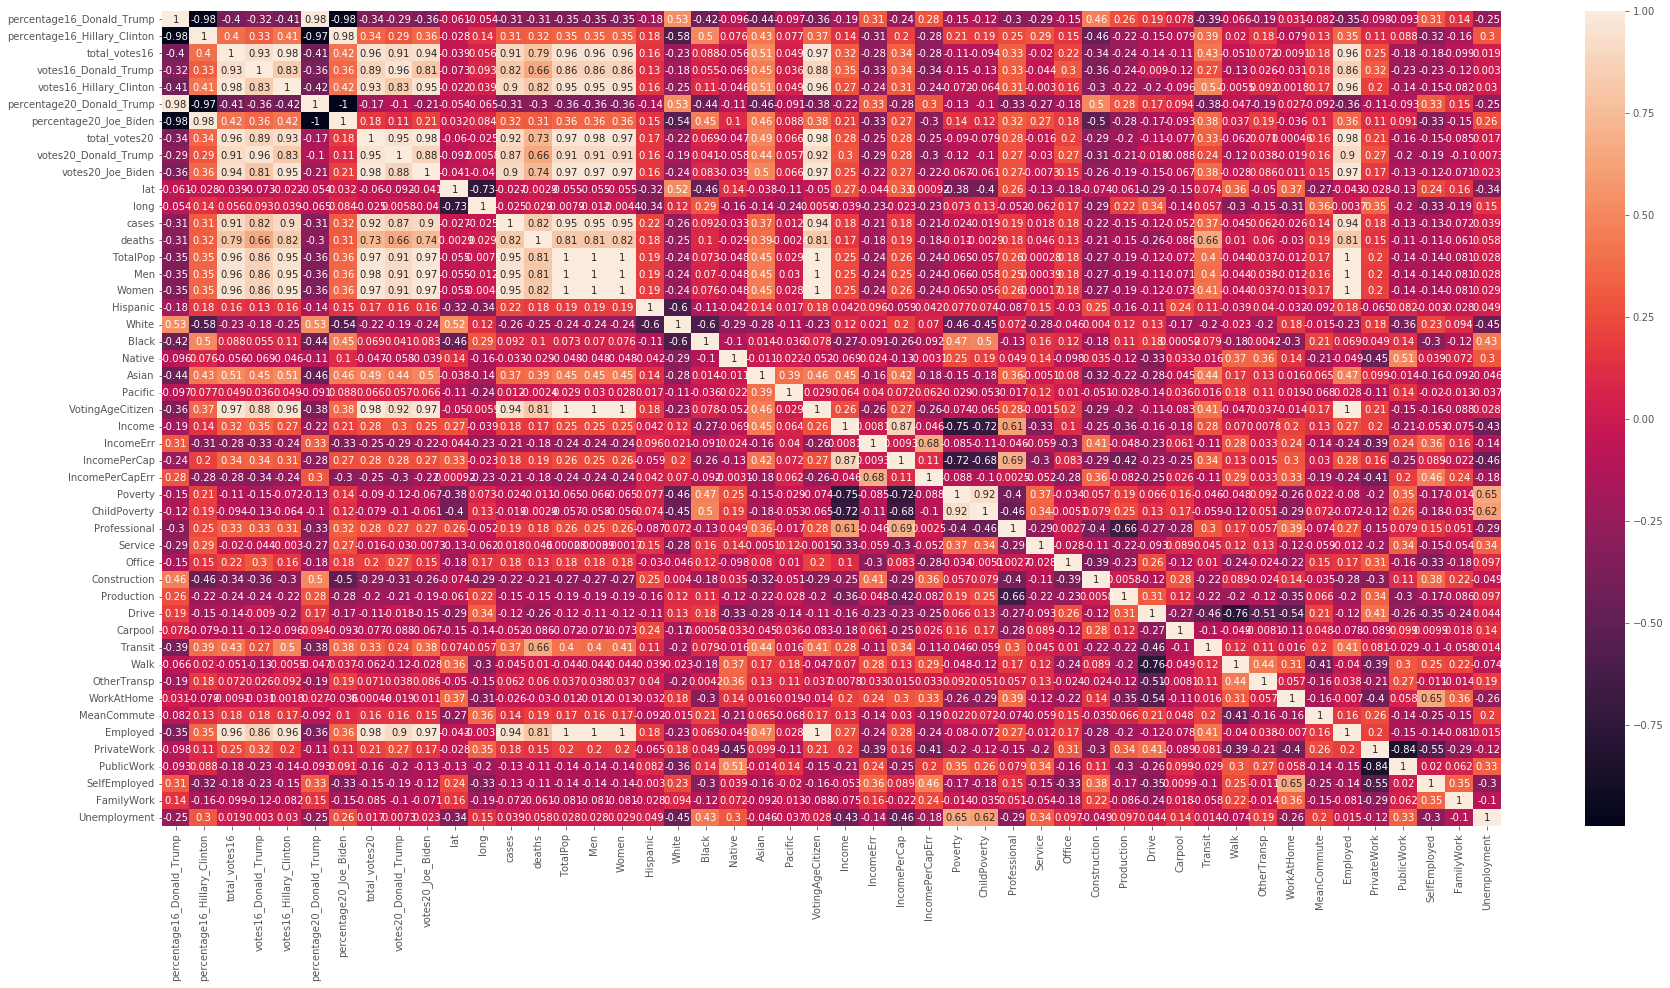

In [33]:
plt.rcParams['figure.figsize'] = (30,15)
sns.heatmap(df.corr(),annot=True)

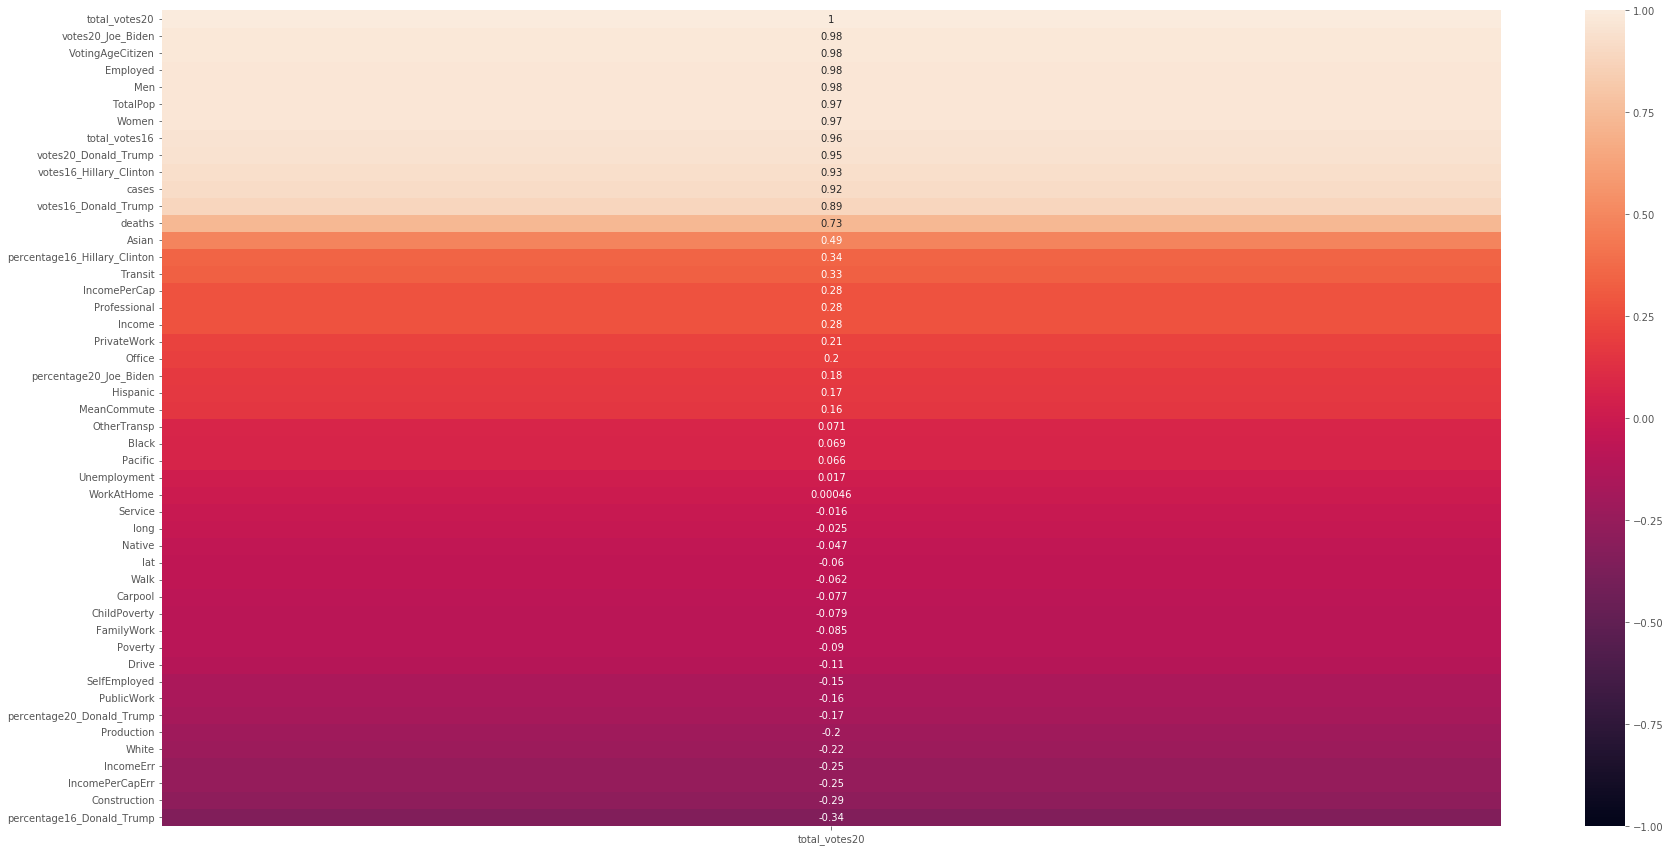

In [34]:
sns.heatmap(df.corr()[['total_votes20']].sort_values('total_votes20').tail(100),vmax=1, vmin=-1, annot=True).invert_yaxis()

As is visible from the heatmap, the variable Employed seems to be most correlated with the 2020 votes

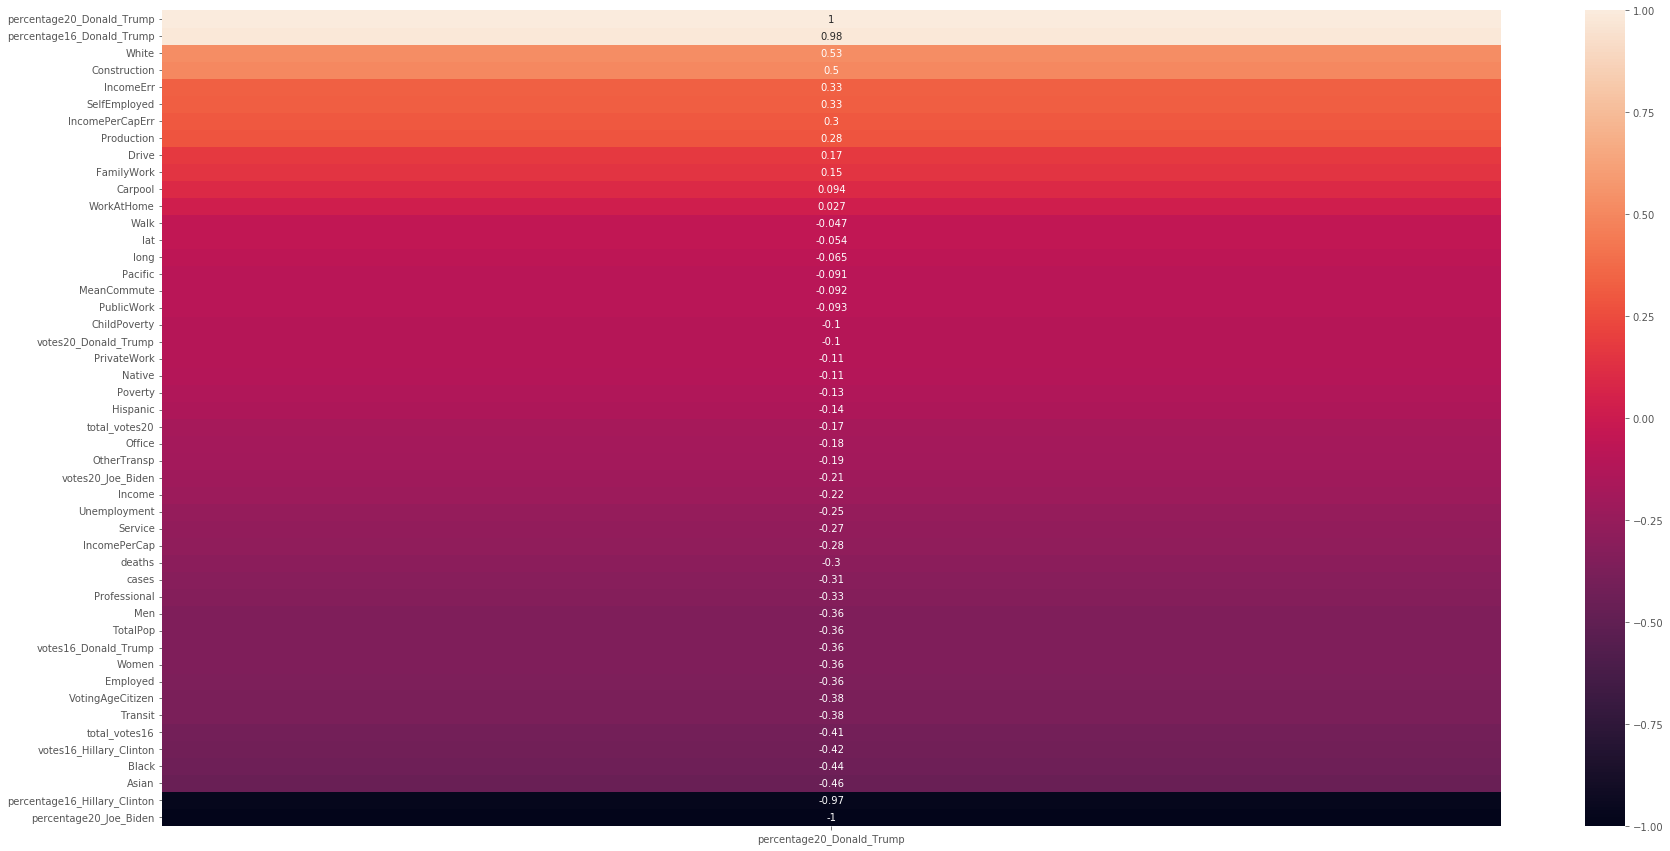

In [35]:
sns.heatmap(df.corr()[['percentage20_Donald_Trump']].sort_values('percentage20_Donald_Trump').tail(100), vmax=1, vmin=-1, annot=True).invert_yaxis() 

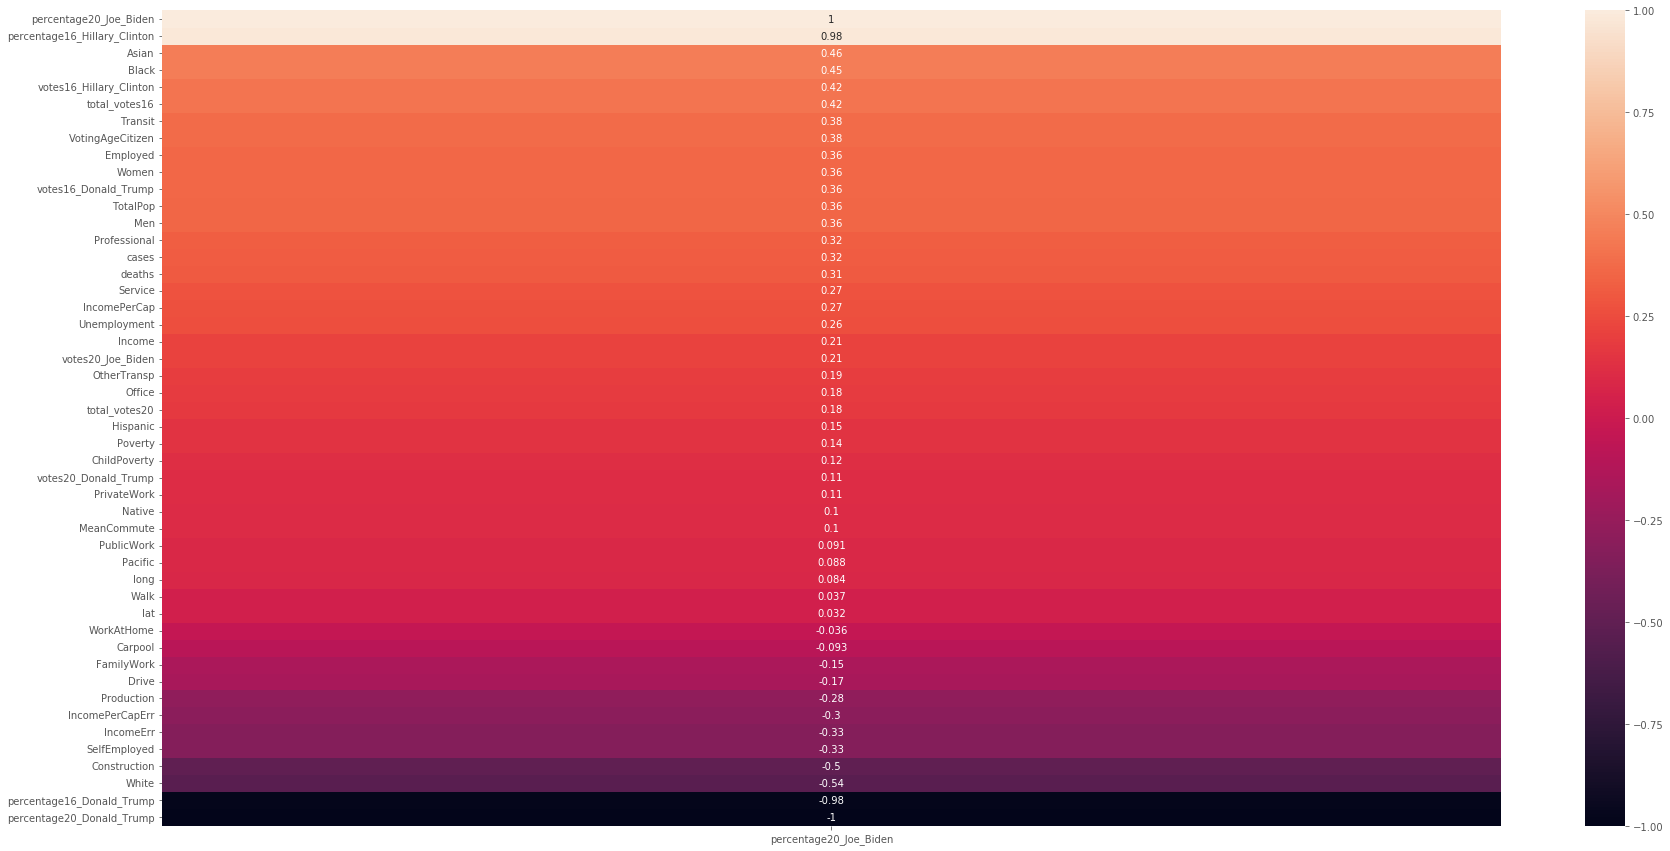

In [36]:
sns.heatmap(df.corr()[['percentage20_Joe_Biden']].sort_values('percentage20_Joe_Biden').tail(100), vmax=1, vmin=-1, annot=True).invert_yaxis() 

Variables that produced correlations to Trump's percentage of the vote are:Construction, White

Variables that produced correlations to Biden's percentage of the vote are:Asian, Black

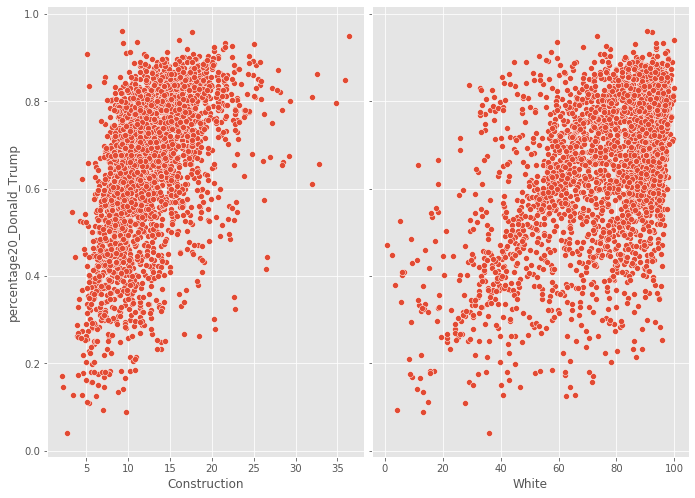

In [37]:
#let's go ahead and perform simple linear regression
#Checking relationship between features and response
sns.pairplot(df,x_vars=['Construction','White'],y_vars='percentage20_Donald_Trump',height=7,aspect=0.7)

Race: Asians and Blacks were the great differential

# Feature Engineering

In [38]:
import sklearn.utils
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from numpy import mean, std
from sklearn.metrics import recall_score,r2_score, mean_squared_error, mean_absolute_error, accuracy_score, precision_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold, train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

/home/uthmani/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [39]:
df.info()

#removing some columns
df = df.drop(columns = [ 'county','lat', 'long',], axis = 1)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4867 entries, 0 to 4866
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   county                        4867 non-null   object 
 1   state                         4867 non-null   object 
 2   percentage16_Donald_Trump     3111 non-null   float64
 3   percentage16_Hillary_Clinton  3111 non-null   float64
 4   total_votes16                 3111 non-null   float64
 5   votes16_Donald_Trump          3111 non-null   float64
 6   votes16_Hillary_Clinton       3111 non-null   float64
 7   percentage20_Donald_Trump     4490 non-null   float64
 8   percentage20_Joe_Biden        4490 non-null   float64
 9   total_votes20                 4633 non-null   float64
 10  votes20_Donald_Trump          4633 non-null   float64
 11  votes20_Joe_Biden             4633 non-null   float64
 12  lat                           3252 non-null   float64
 13  lon

,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,votes20_Donald_Trump,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,12433.0,8215.0,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,28425.0,22596.0,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,16938.0,9172.0,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,259389.0,130699.0,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,4183.0,2917.0,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0


In [40]:
df.isnull().sum()

df.fillna(df.median(), inplace = True)
df.isnull().sum()

<ipython-input-40-686aa44fca16>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace = True)


state                           0
percentage16_Donald_Trump       0
percentage16_Hillary_Clinton    0
total_votes16                   0
votes16_Donald_Trump            0
votes16_Hillary_Clinton         0
percentage20_Donald_Trump       0
percentage20_Joe_Biden          0
total_votes20                   0
votes20_Donald_Trump            0
votes20_Joe_Biden               0
cases                           0
deaths                          0
TotalPop                        0
Men                             0
Women                           0
Hispanic                        0
White                           0
Black                           0
Native                          0
Asian                           0
Pacific                         0
VotingAgeCitizen                0
Income                          0
IncomeErr                       0
IncomePerCap                    0
IncomePerCapErr                 0
Poverty                         0
ChildPoverty                    0
Professional  

The data contains a lot of missing values, removing values can make the prediction model less accurate. You should try to impute missing values as much as possible. i will replace missing values with the median values in the column.


Based on the available data, we consider state as a categorical feature
Let’s make non-numeric columns numeric for better performance. Note that some model types cannot perform with non-numerical data.


In [41]:
# label encode categorical columns
lblEncoder_state = LabelEncoder()
lblEncoder_state.fit(df['state'])
df['state'] = lblEncoder_state.transform(df['state'])



## Normalizing using MINMAX Scaler

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns =df.columns)
normalised_df

,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,total_votes20,votes20_Donald_Trump,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0.80,0.644737,0.351171,0.004606,0.011323,0.002241,0.687110,0.308566,0.003003,0.007420,...,0.030405,0.041667,0.196970,0.5175,0.001970,0.826690,0.147351,0.205263,0.0125,0.326389
1,0.36,0.802632,0.195095,0.011806,0.035741,0.003405,0.826403,0.165119,0.006866,0.020410,...,0.027027,0.050926,0.075758,0.5625,0.005190,0.847487,0.127483,0.200000,0.0375,0.309028
2,0.90,0.552632,0.442586,0.006780,0.014439,0.004069,0.563410,0.429309,0.004091,0.008285,...,0.043919,0.041667,0.136364,0.4225,0.002871,0.753899,0.226821,0.186842,0.0250,0.187500
3,0.26,0.480263,0.396878,0.084488,0.158689,0.045734,0.523909,0.447884,0.062656,0.118056,...,0.025338,0.064815,0.209091,0.3825,0.044726,0.818024,0.175497,0.173684,0.0125,0.149306
4,0.24,0.671053,0.299889,0.001597,0.004063,0.000679,0.724532,0.263158,0.001010,0.002635,...,0.047297,0.009259,0.187879,0.4300,0.000758,0.740035,0.180464,0.273684,0.0625,0.104167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4862,0.00,0.686404,0.283166,0.004697,0.011958,0.001895,0.627859,0.356037,0.001802,0.003923,...,0.271959,0.064815,0.115152,0.1475,0.000981,0.447140,0.500000,0.205263,0.0875,0.260417
4863,0.00,0.686404,0.283166,0.004697,0.011958,0.001895,0.627859,0.356037,0.001802,0.003923,...,0.266892,0.134259,0.254545,0.1075,0.000220,0.370884,0.461921,0.328947,0.3250,0.243056
4864,0.00,0.686404,0.283166,0.004697,0.011958,0.001895,0.627859,0.356037,0.001802,0.003923,...,0.454392,0.115741,0.127273,0.0350,0.000070,0.251300,0.655629,0.271053,0.0000,0.225694
4865,0.00,0.686404,0.283166,0.004697,0.011958,0.001895,0.627859,0.356037,0.001802,0.003923,...,0.672297,0.444444,0.242424,0.0825,0.000425,0.133449,0.862583,0.123684,0.0000,0.684028


In [58]:
# Using total_votes20 column as the Target Variable
X = normalised_df.drop(columns = ['total_votes20'])
Y = normalised_df['total_votes20']
X

,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,votes20_Donald_Trump,votes20_Joe_Biden,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0.80,0.644737,0.351171,0.004606,0.011323,0.002241,0.687110,0.308566,0.007420,0.001391,...,0.030405,0.041667,0.196970,0.5175,0.001970,0.826690,0.147351,0.205263,0.0125,0.326389
1,0.36,0.802632,0.195095,0.011806,0.035741,0.003405,0.826403,0.165119,0.020410,0.001847,...,0.027027,0.050926,0.075758,0.5625,0.005190,0.847487,0.127483,0.200000,0.0375,0.309028
2,0.90,0.552632,0.442586,0.006780,0.014439,0.004069,0.563410,0.429309,0.008285,0.002571,...,0.043919,0.041667,0.136364,0.4225,0.002871,0.753899,0.226821,0.186842,0.0250,0.187500
3,0.26,0.480263,0.396878,0.084488,0.158689,0.045734,0.523909,0.447884,0.118056,0.040894,...,0.025338,0.064815,0.209091,0.3825,0.044726,0.818024,0.175497,0.173684,0.0125,0.149306
4,0.24,0.671053,0.299889,0.001597,0.004063,0.000679,0.724532,0.263158,0.002635,0.000406,...,0.047297,0.009259,0.187879,0.4300,0.000758,0.740035,0.180464,0.273684,0.0625,0.104167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4862,0.00,0.686404,0.283166,0.004697,0.011958,0.001895,0.627859,0.356037,0.003923,0.000819,...,0.271959,0.064815,0.115152,0.1475,0.000981,0.447140,0.500000,0.205263,0.0875,0.260417
4863,0.00,0.686404,0.283166,0.004697,0.011958,0.001895,0.627859,0.356037,0.003923,0.000819,...,0.266892,0.134259,0.254545,0.1075,0.000220,0.370884,0.461921,0.328947,0.3250,0.243056
4864,0.00,0.686404,0.283166,0.004697,0.011958,0.001895,0.627859,0.356037,0.003923,0.000819,...,0.454392,0.115741,0.127273,0.0350,0.000070,0.251300,0.655629,0.271053,0.0000,0.225694
4865,0.00,0.686404,0.283166,0.004697,0.011958,0.001895,0.627859,0.356037,0.003923,0.000819,...,0.672297,0.444444,0.242424,0.0825,0.000425,0.133449,0.862583,0.123684,0.0000,0.684028


## 70:30 Split for training and testing

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Linear Regression Model

In [60]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [65]:
#predicted values of the model
predicted_values = model.predict(x_test)
#Mean Absolute Error of the model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 5)

4e-05

In [66]:
rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test,predicted_values))
round(rmse, 5)

0.0001

In [67]:
r2_scr = sklearn.metrics.r2_score(y_test, predicted_values)
round(r2_scr, 5)

0.99999

# Ridge and Lasso Regression Models

In [74]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)
predicted_vals = ridge_reg.predict(x_test)

ridge_r2_scr = sklearn.metrics.r2_score(y_test, predicted_vals)
round(r2_scr, 5)

0.95611

In [123]:
ridge_mae = mean_absolute_error(y_test, predicted_vals)
round(ridge_mae, 5)

0.00145

In [124]:
ridge_rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test,predicted_vals))
round(ridge_rmse, 5)

0.0077

In [80]:
lasso_reg = Lasso(alpha=0.0)
lasso_reg.fit(x_train, y_train)
predicted_lals = lasso_reg.predict(x_test)
lasso_r2_scr = sklearn.metrics.r2_score(y_test, predicted_lals)
round(lasso_r2_scr, 3)

<ipython-input-80-9b19c6bff98c>:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_reg.fit(x_train, y_train)
/home/uthmani/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


1.0

In [125]:
lasso_mae = mean_absolute_error(y_test, predicted_lals)
round(lasso_mae, 5)

5e-05

In [126]:
lasso_rmse = np.sqrt(sklearn.metrics.mean_squared_error(y_test,predicted_lals))
round(lasso_rmse, 5)

0.00014

# Random Forest Regressor

In [86]:
Regressor = RandomForestRegressor()

In [87]:
Regressor.fit(x_train, y_train)

RandomForestRegressor()

In [93]:
predicted_regr = Regressor.predict(x_test)

Reg_r2_scr = sklearn.metrics.r2_score(y_test, predicted_regr)
round(Reg_r2_scr, 5)

0.80285

In [89]:
mae_reg = mean_absolute_error(y_test, predicted_regr)
round(mae_reg, 5)

0.00105

In [90]:
rmse_reg = np.sqrt(sklearn.metrics.mean_squared_error(y_test,predicted_regr))
round(rmse_reg, 5)

0.01632

# XGBoost Regressor

In [101]:
XGB = XGBRegressor()

In [102]:
XGB.fit(x_train, y_train)

/home/uthmani/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [106]:
predicted_XGB = XGB.predict(x_test)

XGB_r2_scr = sklearn.metrics.r2_score(y_test, predicted_XGB)
round(XGB_r2_scr, 5)

/home/uthmani/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.81872

In [107]:
mae_XGB = mean_absolute_error(y_test, predicted_XGB)
round(mae_XGB, 5)

0.00115

In [108]:
rmse_XGB = np.sqrt(sklearn.metrics.mean_squared_error(y_test,predicted_XGB))
round(rmse_XGB, 5)

0.01565

# LGBM Regressor

In [104]:
LGBM = LGBMRegressor()

In [105]:
LGBM.fit(x_train, y_train)

LGBMRegressor()

In [109]:
predicted_LGBM = LGBM.predict(x_test)

LGBM_r2_scr = sklearn.metrics.r2_score(y_test, predicted_LGBM)
round(LGBM_r2_scr, 5)

0.66647

In [110]:
mae_LGBM = mean_absolute_error(y_test, predicted_LGBM)
round(mae_LGBM, 5)

0.00161

In [111]:
rmse_LGBM = np.sqrt(sklearn.metrics.mean_squared_error(y_test,predicted_LGBM))
round(rmse_LGBM, 5)

0.02123

## Cross Validation for LGBM REGRESSOR

In [113]:
#measuring performance
#Cross validation and accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LGBM, x_train, y_train, cv=5, scoring='f1_macro')
scores

/home/uthmani/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/uthmani/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/uthmani/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/home/uthmani/.local/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/uthmani/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/home/uthmani/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py",

array([nan, nan, nan, nan, nan])

In [119]:
# KFOLD CROSS VALIDATION
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

kf = KFold(n_splits=5)
kf.split(x_train)
R2_scores = []
# run for every split
for train_index, test_index in kf.split(x_train):
    x_trainKF, x_testKF = x_train.iloc[train_index], x_train.iloc[test_index]
    y_trainKF, y_test_Kfold = y_train.iloc[train_index], y_train.iloc[test_index]
    model = LGBMRegressor().fit(x_trainKF, y_trainKF)
    #save result to list
    R2_scores.append(r2_score(y_true=y_test_Kfold, y_pred=model.predict(x_testKF))*100)
    
R2_scores
    

[91.43584385244347,
 93.86372673536442,
 94.9484626243208,
 88.03879252275188,
 82.34835497639833]